In [1]:
import scanpy as sc
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

sc.set_figure_params(dpi=100, frameon=False, color_map='Reds', facecolor=None)
sc.logging.print_header()

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


## Measure consistency of feature attributions per latent dimension

In [41]:
import os

eg_fa = {}
path = '../notebooks/gradient_based/'
for file in os.listdir(path):
    if 'task1_abssum_EG' in file:
        print(file)
        eg_fa[file.split('_')[1] + '_' + file.split('_')[2]] = pd.read_csv(path + '/' + file, index_col=0)

norman19_model2_random_v2_task1_abssum_EG_v2.csv
norman19_model4_shuffled_task1_abssum_EG.csv
norman19_model4_random_task1_abssum_EG.csv
norman19_model2_random_task1_abssum_EG.csv
norman19_model2_shuffled_task1_abssum_EG.csv
norman19_model1_shuffled_task1_abssum_EG.csv
norman19_model3_random_task1_abssum_EG.csv
norman19_model0_random_task1_abssum_EG.csv
norman19_model3_shuffled_task1_abssum_EG.csv
norman19_model1_random_task1_abssum_EG.csv
norman19_model0_shuffled_task1_abssum_EG.csv


Correlation of the attributions between latent space features.

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<Figure size 700x600 with 0 Axes>

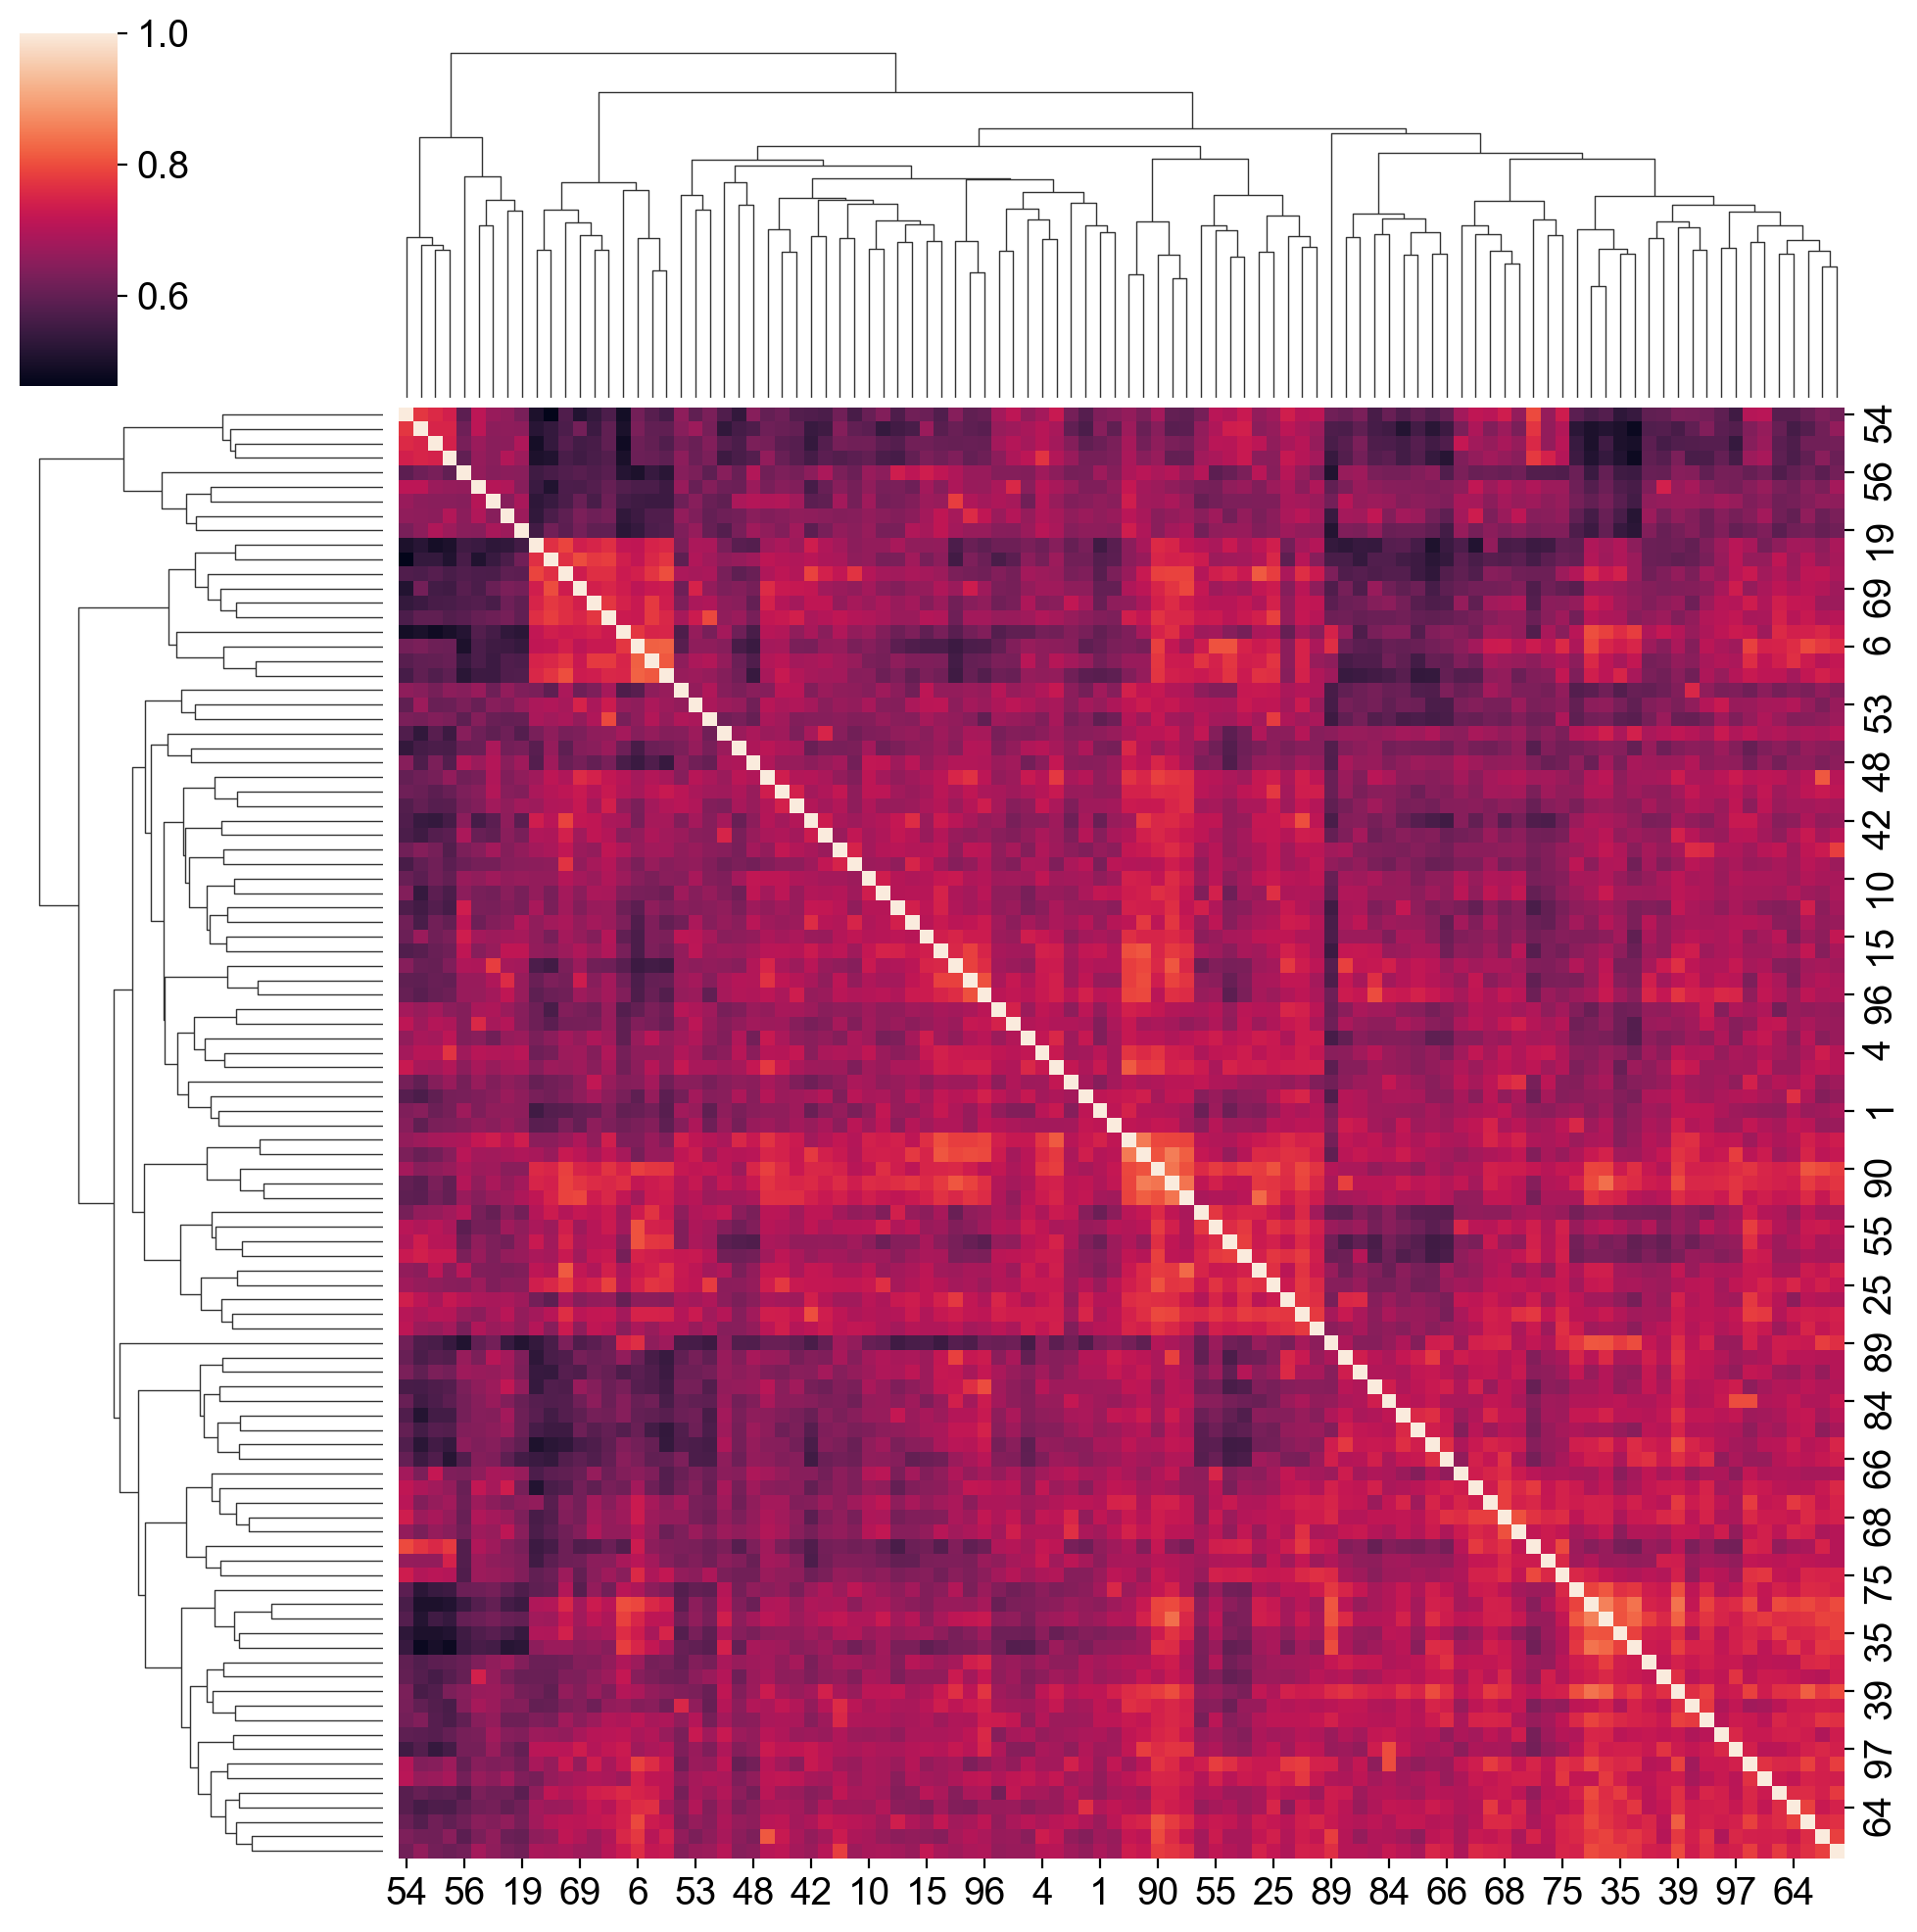

In [42]:
plt.figure(figsize=(7, 6))
sns.clustermap(eg_fa['model2_random'].corr('pearson'))

In [43]:
# plt.figure(figsize=(7, 6))
# sns.clustermap(eg_fa['model4_shuffled'].corr('pearson'))

Spearman instead of Pearson.

<Figure size 700x600 with 0 Axes>

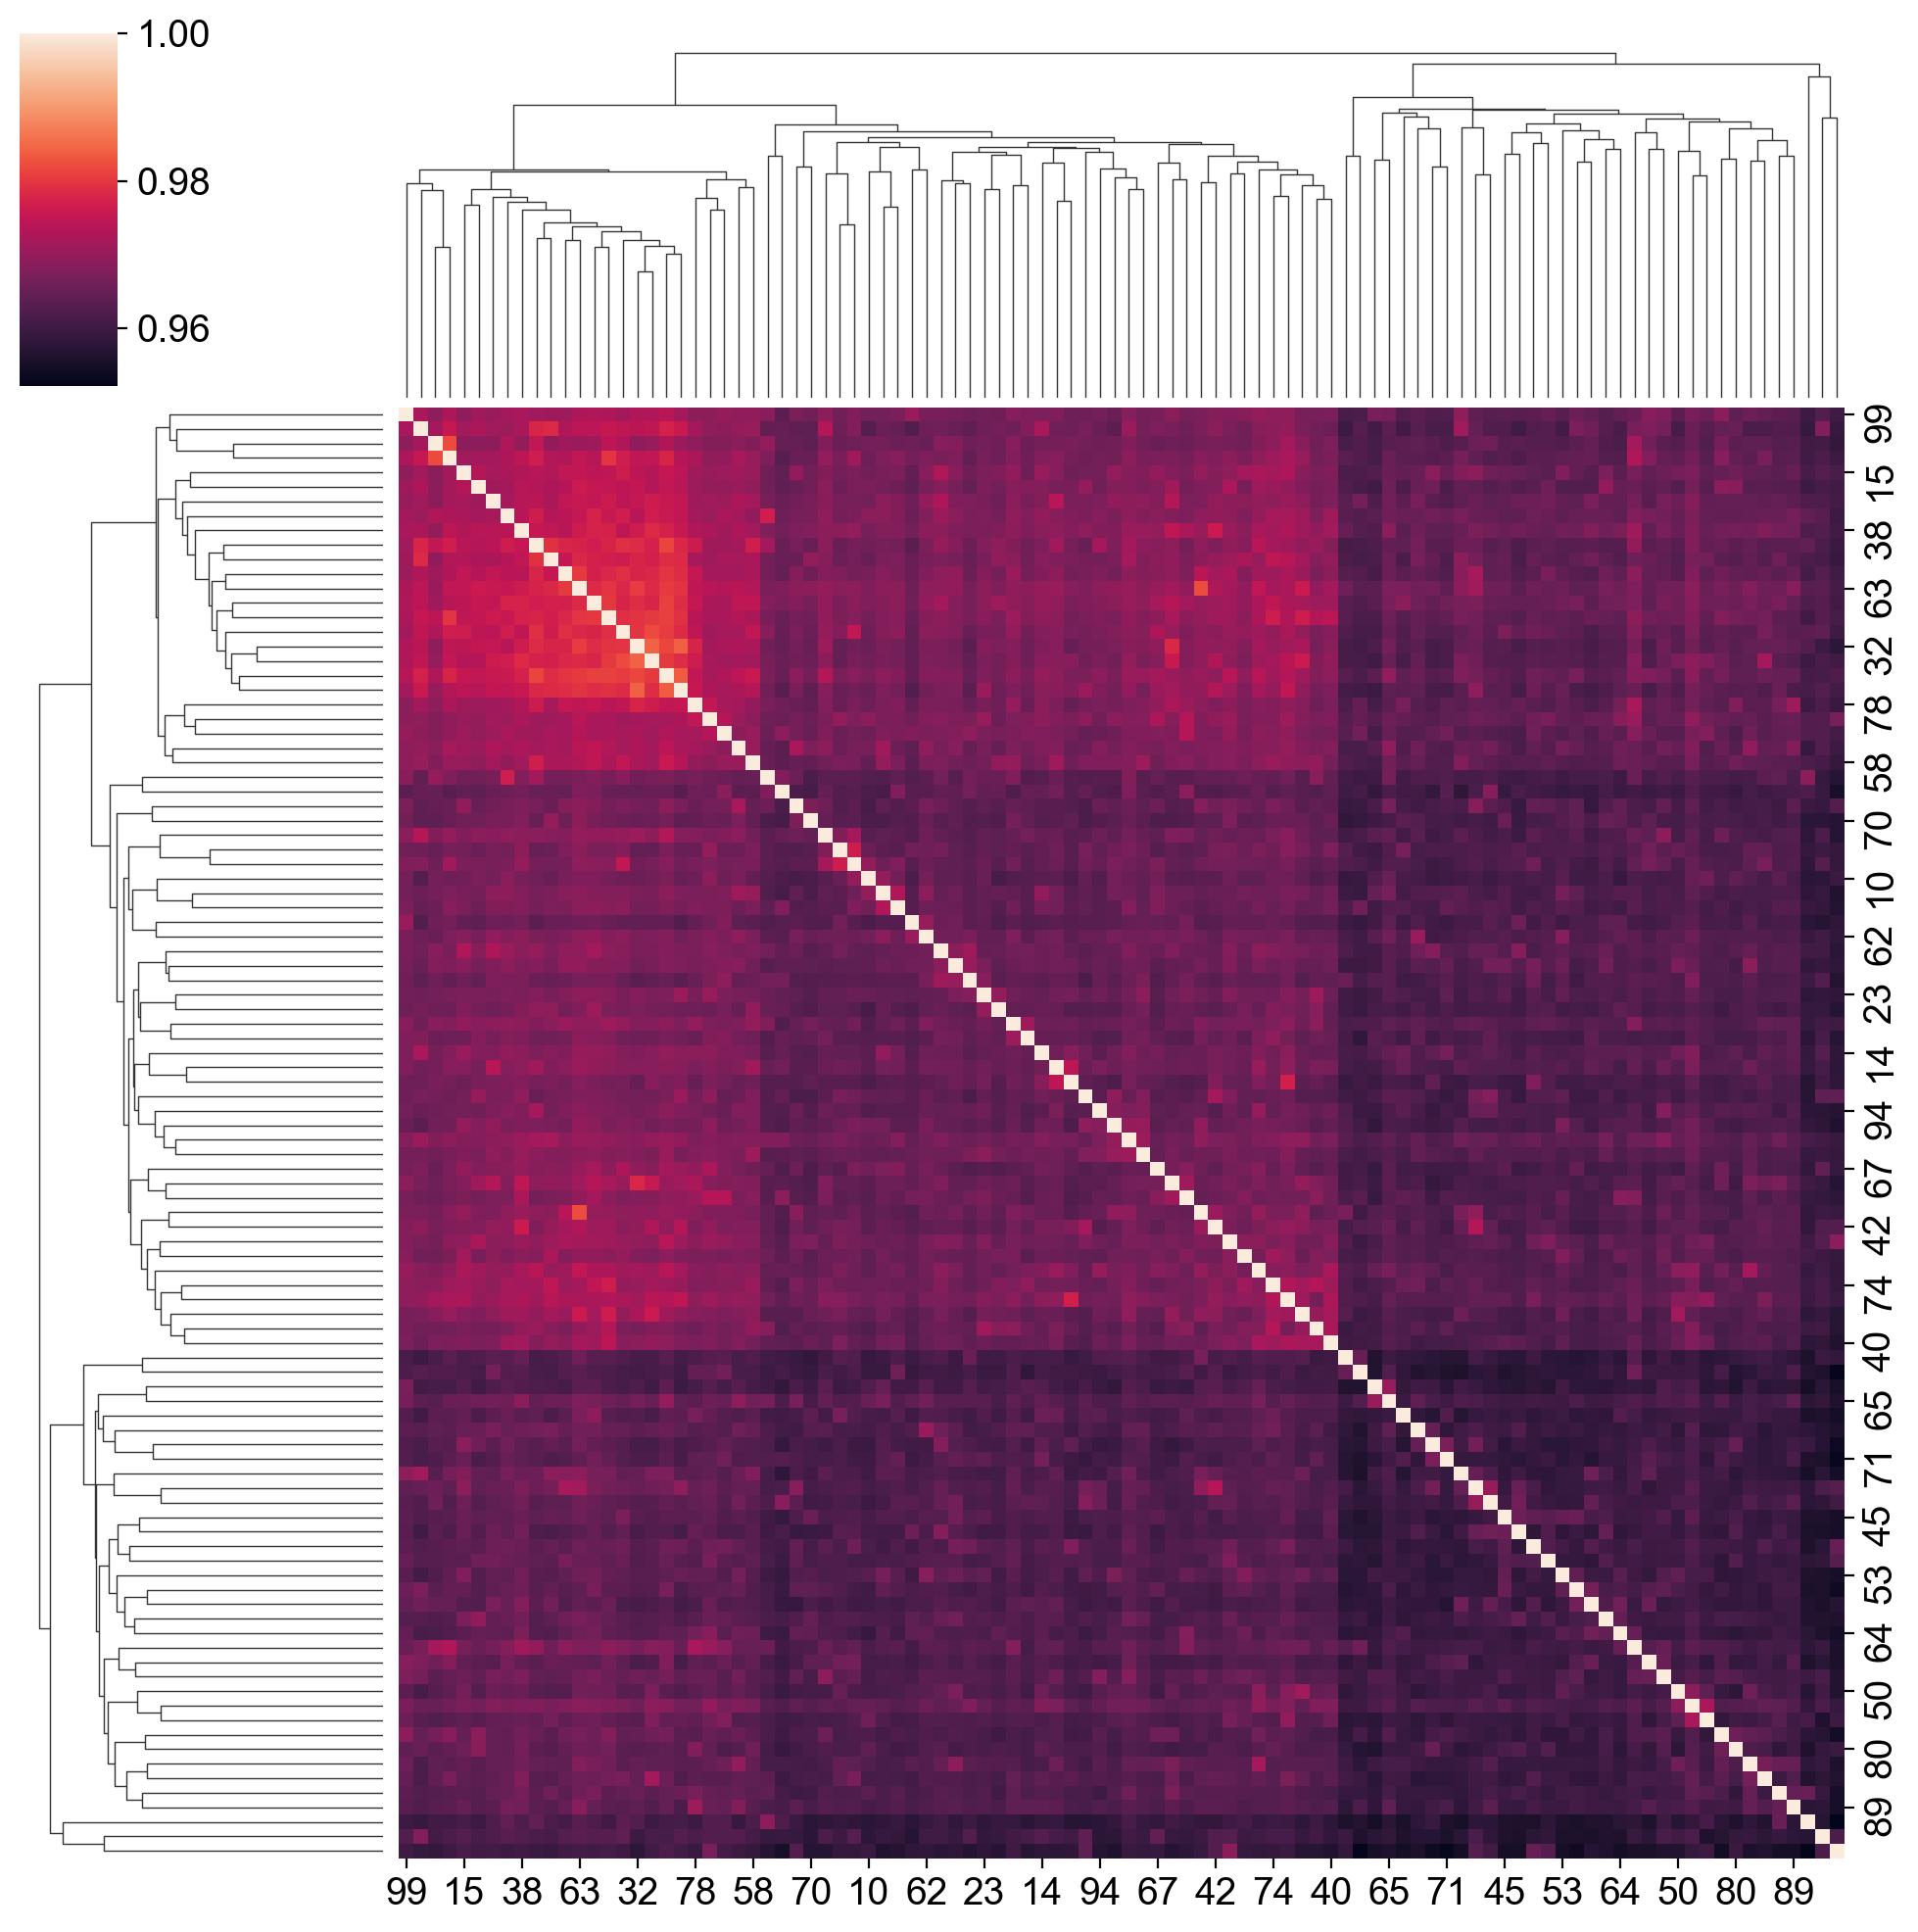

In [46]:
plt.figure(figsize=(7, 6))
sns.clustermap(eg_fa['model2_random'].corr('spearman'))

Correlations between attributions between models.

In [47]:
df1 = eg_fa['model4_shuffled']
df2 = eg_fa['model1_shuffled'].add_suffix('_2')

conc = pd.concat([df1, df2], axis=1).corr('pearson')

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<Figure size 700x600 with 0 Axes>

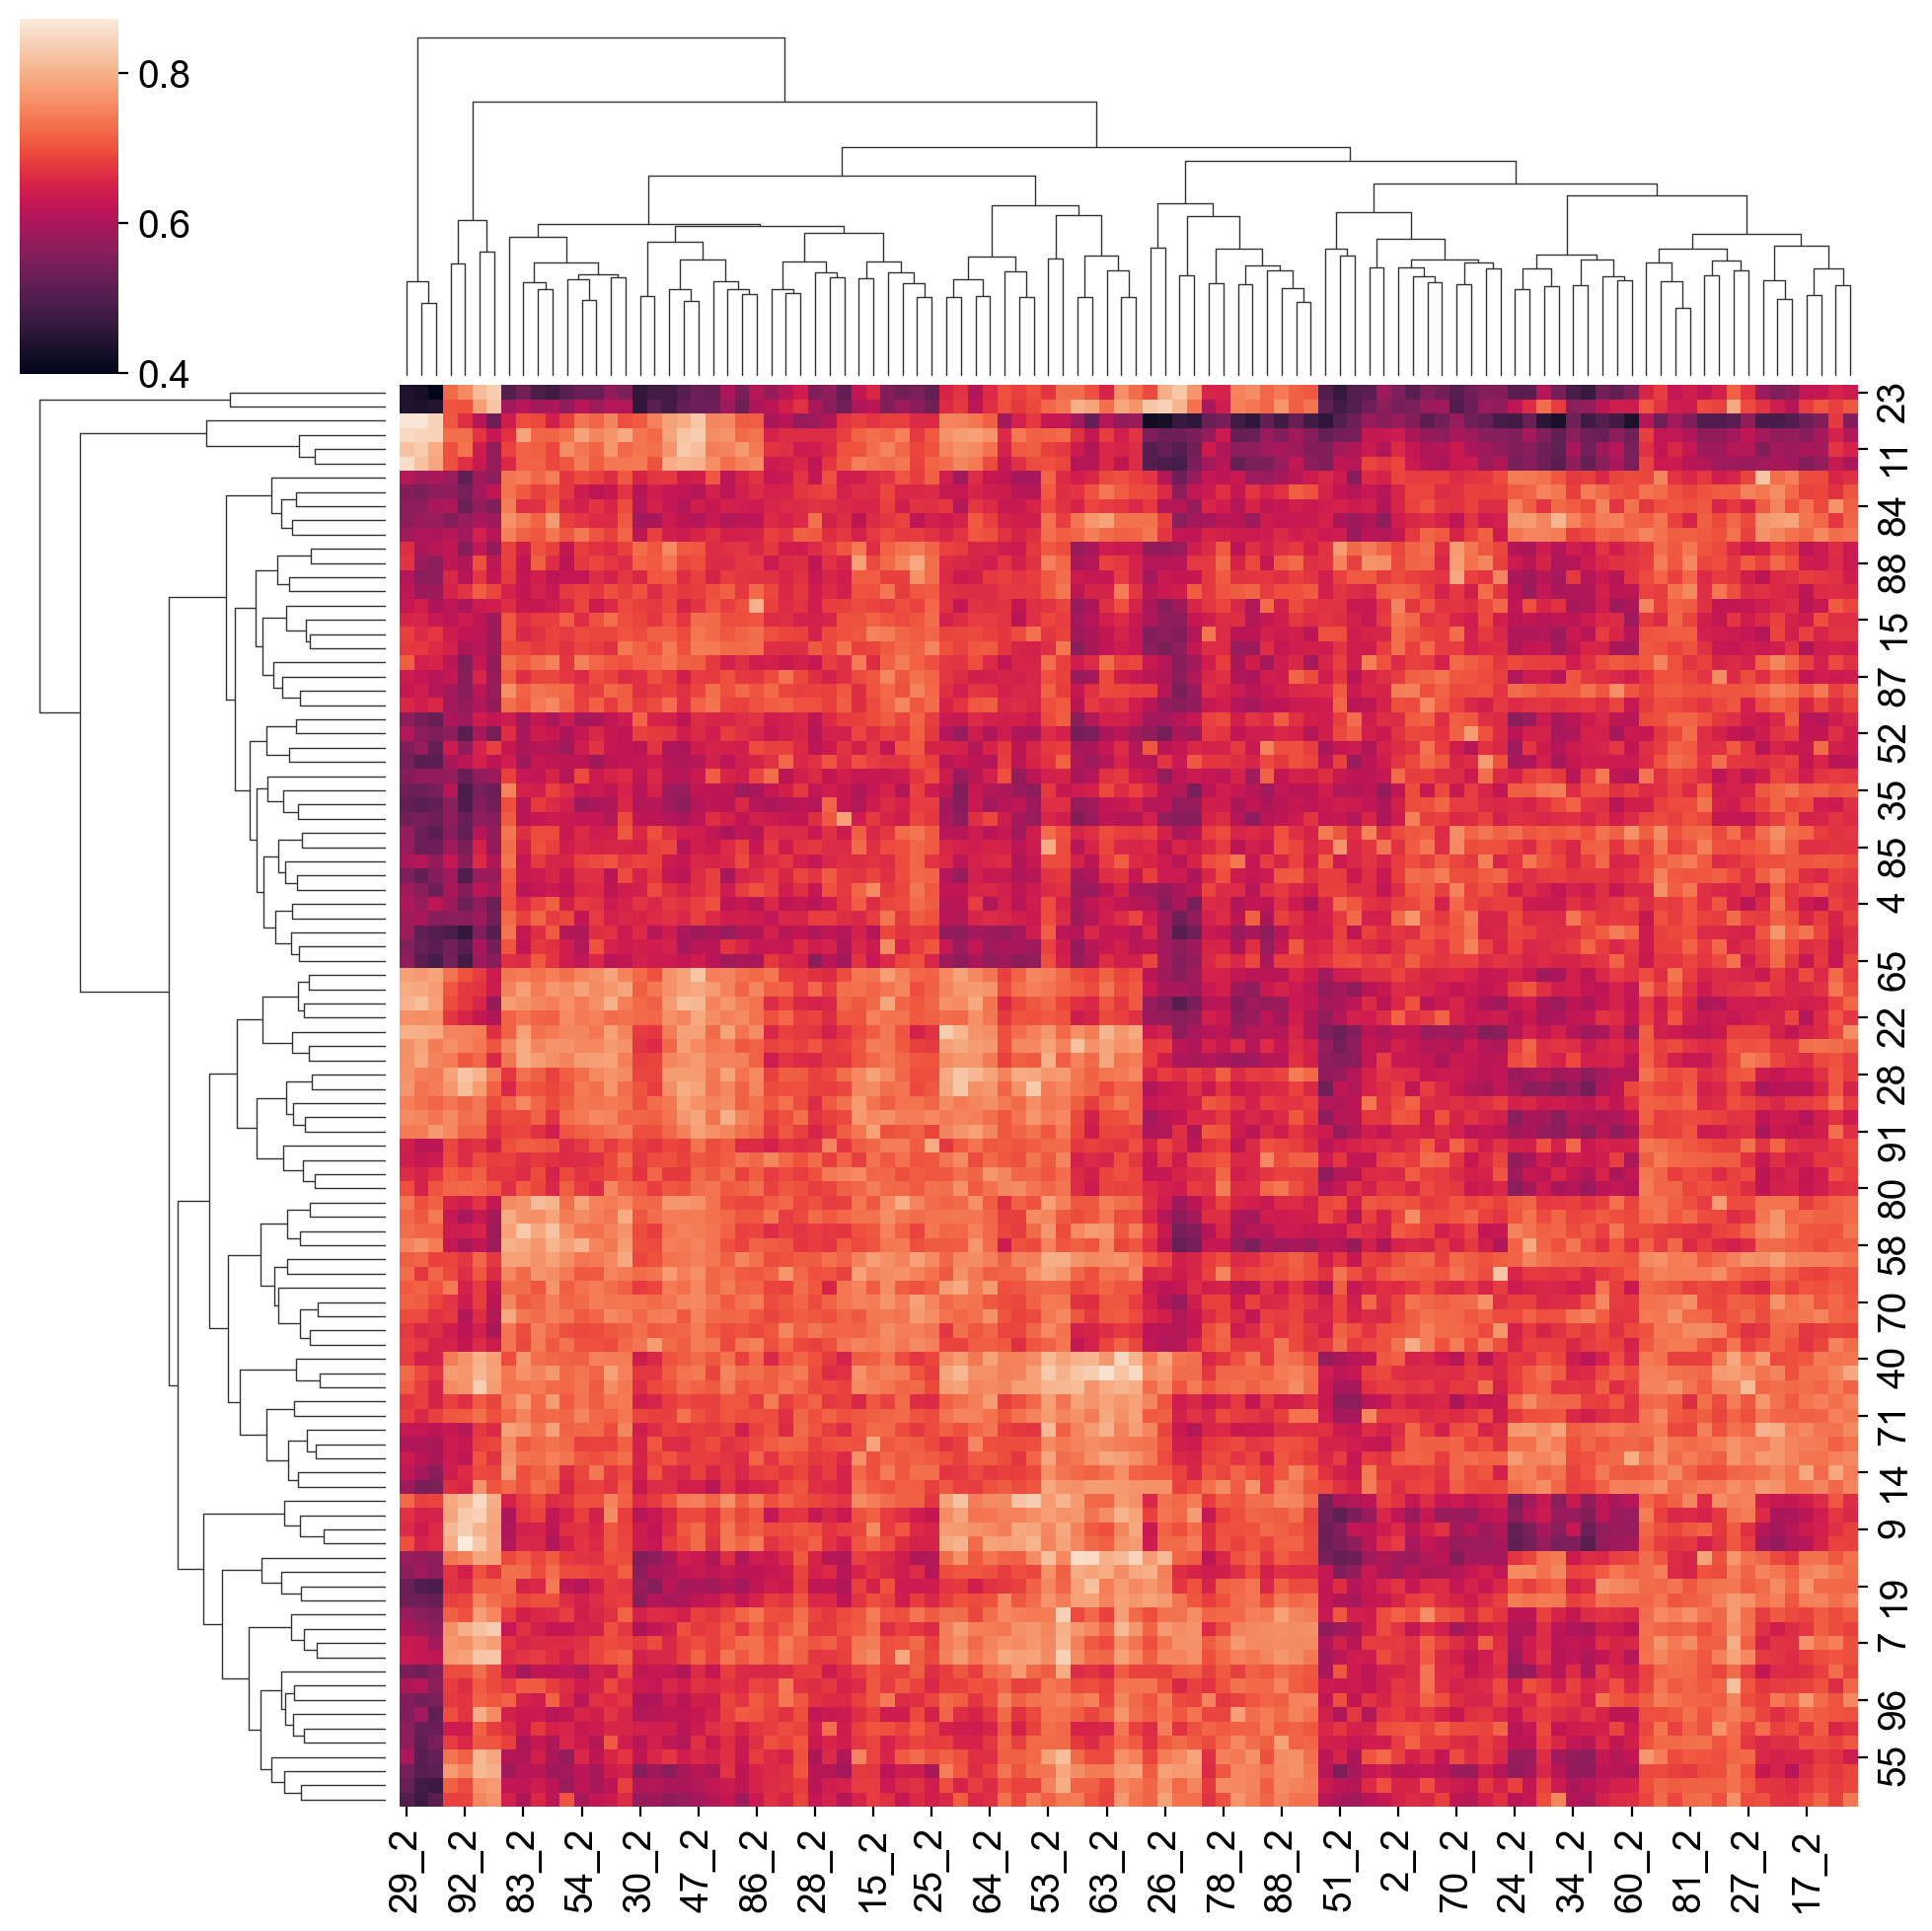

In [48]:
plt.figure(figsize=(7, 6))
sns.clustermap(conc[df2.columns].loc[df1.columns])

TODO: Repeat for the v2 models.

In [51]:
import os

eg_fa = {}
path = '../notebooks/gradient_based/'
for file in os.listdir(path):
    if 'task1_abssum_EG_v2' in file:
        print(file)
        eg_fa[file.split('_')[1] + '_' + file.split('_')[2]] = pd.read_csv(path + '/' + file, index_col=0)

norman19_model2_random_v2_task1_abssum_EG_v2.csv


Correlation of the attributions between latent space features.

In [52]:
# plt.figure(figsize=(7, 6))
# sns.clustermap(eg_fa['model2_random'].corr('pearson'))

In [53]:
# plt.figure(figsize=(7, 6))
# sns.clustermap(eg_fa['model2_random'].corr('spearman'))

Correlations between attributions between models.

In [54]:
# df1 = eg_fa['model4_shuffled']
# df2 = eg_fa['model1_shuffled'].add_suffix('_2')

# conc = pd.concat([df1, df2], axis=1).corr('pearson')
# plt.figure(figsize=(7, 6))
# sns.clustermap(conc[df2.columns].loc[df1.columns])

In [55]:
# auc_scores = dict()
# for explainer, df in eg_fa.items():
#     print(explainer)
#     auc_scores[explainer] = benchmarking.roc_auc_crispr(df)

## Robustness of explanations

In [30]:
methods_to_paths = {
    'full':'integrated_gradients/task_1_absolute_integrated_grads.csv',
    'hvg':'integrated_gradients/task_1_absolute_integrated_grads_v2.csv'
}

In [31]:
default_df = pd.read_csv(f"../outputs/{methods_to_paths['hvg']}", index_col=0)

In [32]:
default_df

,AHR,ARID1A,ARRDC3,ATL1,BAK1,BCL2L11,BCORL1,BPGM,C3orf72,C19orf26,...,TP73,TSC22D1,UBASH3A,UBASH3B,ZBTB1,ZBTB10,ZBTB25,ZC3HAV1,ZNF318,control
gene_symbols,,,,,,,,,,,,,,,,,,,,,
SAMD11,3.791419,2.350351,2.245172,1.287139,7.569789,2.619869,1.103736,3.203478,2.099038,2.941718,...,1.497110,1.752076,3.485513,8.223483,1.785609,3.837095,1.827373,0.949604,1.583163,48.381454
HES4,125.529590,35.119663,109.442990,73.323660,326.370880,129.244220,89.700970,99.527580,48.091530,190.301360,...,25.690529,123.084640,185.292070,301.745820,156.976000,28.369438,140.568310,100.184525,169.196210,2646.595500
ISG15,232.120350,77.602135,195.530150,120.136410,560.213130,222.854350,189.133180,165.868760,121.523530,326.795930,...,133.315690,196.448300,310.351930,425.810850,254.518740,70.688490,265.759550,181.268400,318.567570,4690.142000
MMP23B,11.351492,8.222809,5.277307,7.283207,17.767334,5.726194,3.035446,6.891820,1.484689,9.459290,...,13.598379,4.908533,10.795803,17.598461,18.523163,3.516813,11.059156,4.693916,8.884116,108.023360
SMIM1,126.898940,83.623610,93.947700,206.621660,228.456220,84.443016,83.498070,105.943800,93.159134,206.405180,...,341.069950,79.637600,187.950470,311.223570,273.563020,53.552070,196.849620,61.096060,117.994120,2012.891000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BCORL1,23.406008,9.815758,20.870287,15.775652,49.160004,17.377804,84.270370,17.878940,7.904472,34.536842,...,10.158300,17.478355,30.639463,41.820700,29.679718,4.875753,35.182660,14.734574,27.007816,421.342900
LYL1,311.354950,162.138670,229.250490,196.258770,705.127560,264.101900,265.172700,198.983230,155.588030,394.205230,...,220.177550,200.457370,391.228670,544.801330,257.219150,99.294680,311.434780,246.089660,328.056030,5505.758000
FOSB,0.159345,0.289122,0.846901,0.219426,2.824068,0.413220,0.790819,1.665787,0.746444,3.398516,...,0.684413,0.588271,2.051637,1.988976,2.395994,0.424378,2.289434,1.066466,1.141304,24.901775


In [33]:
%%time
corrs = []
for ct in default_df.columns:
    broken = False
    ct_df = pd.DataFrame(index=list(default_df.index),
                          columns=methods_to_paths.keys())
    for method, path in methods_to_paths.items():
        method_df = pd.read_csv(f"../outputs/{path}",
                                index_col=0)
        
        # fix for pvalues being the wrong direction
        if method == 'wilcoxon_DE':
            method_df[:] = -np.log10(method_df)
            method_df.replace(np.Inf, 10000)

        # for when cell types are missing from a df
        try:
            ct_df[method] = method_df[ct]
        except KeyError:
            print(method, ct)
            broken = True
            break
    if broken:
        continue

    ct_df.apply(lambda df: df.abs())
    ct_spearman = ct_df.corr(method="spearman")

#     sns.clustermap(ct_spearman, cmap="seismic", center=0.00)
#     plt.title(ct)
#     plt.show()
    
    corrs.append(ct_spearman.values[0, 1])

CPU times: user 30 s, sys: 560 ms, total: 30.5 s
Wall time: 30.9 s


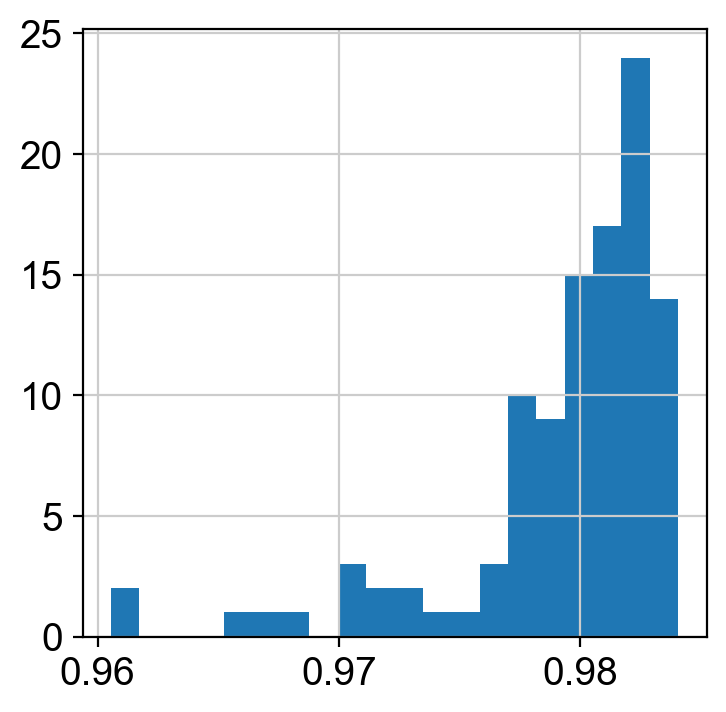

In [34]:
plt.hist(corrs, bins=20);

In [35]:
methods_to_paths = {
    'hvg':'../outputs/integrated_gradients/task_1_absolute_integrated_grads_v2.csv',
    'hvg2': 'gradient_based/norman19_model2_random_v2_task_1_absolute_EG_v2.csv'
}

In [36]:
corrs_hvg = []
for ct in default_df.columns:
    broken = False
    ct_df = pd.DataFrame(index=list(default_df.index),
                          columns=methods_to_paths.keys())
    for method, path in methods_to_paths.items():
        method_df = pd.read_csv(path, index_col=0)
        
        # fix for pvalues being the wrong direction
        if method == 'wilcoxon_DE':
            method_df[:] = -np.log10(method_df)
            method_df.replace(np.Inf, 10000)

        # for when cell types are missing from a df
        try:
            ct_df[method] = method_df[ct]
        except KeyError:
            print(method, ct)
            broken = True
            break
    if broken:
        continue

    ct_df.apply(lambda df: df.abs())
    ct_spearman = ct_df.corr(method="spearman")

#     sns.clustermap(ct_spearman, cmap="seismic", center=0.00)
#     plt.title(ct)
#     plt.show()
    
    corrs_hvg.append(ct_spearman.values[0, 1])

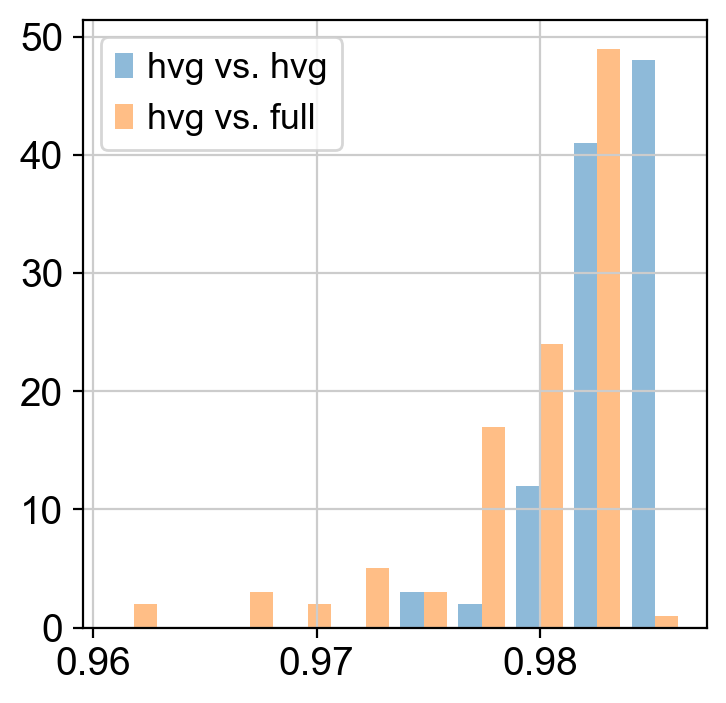

In [40]:
plt.hist([corrs_hvg, corrs], alpha=.5, label=['hvg vs. hvg', 'hvg vs. full'])
plt.legend()

TODO - Across all methods:

In [ ]:
# results_df = pd.DataFrame(index=list(adata.var_names),
#                           columns=methods_to_paths.keys())

In [ ]:
import os

eg_rankings = {}
path = './gradient_based/'
for file in os.listdir(path):
    if 'task_1_absolute_EG_v2' in file:
        print(file)
        eg_rankings[file.split('_')[1] + '_' + file.split('_')[2]] = pd.read_csv(path + '/' + file, index_col=0)